# HANDWRITTEN DIGIT PREDICTION - CLASSIFICATION ANALYSIS

Objective - HANDWRITTEN DIGIT PREDICTION is the process to provide the ability to machines to predict human handwritten digits.

# IMPORTING A LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# IMPORTING DATA

In [2]:
from sklearn.datasets import load_digits
ld=load_digits()

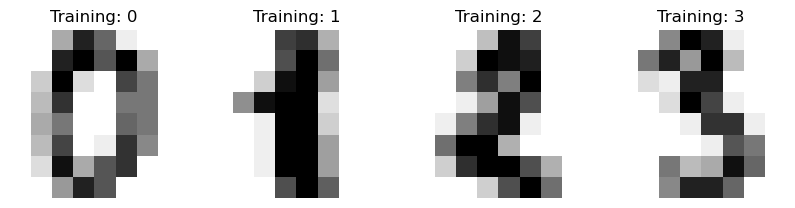

In [3]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax,image,label in zip(axes,ld.images,ld.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)
    

# PREPROCESSING OF DATA

In [4]:
ld.images.shape

(1797, 8, 8)

In [5]:
ld.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [6]:
ld.images[0].shape

(8, 8)

In [8]:
n_samples= len(ld.images)

In [9]:
data = ld.images.reshape(n_samples, -1)

In [10]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [11]:
data[0].shape

(64,)

In [12]:
data.shape

(1797, 64)

# SCALING IMAGE DATA

In [13]:
data.min()

0.0

In [14]:
data.max()

16.0

In [15]:
data = data/16
data.min()

0.0

In [16]:
data.max()

1.0

In [17]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# SPLITING OF DATA INTO TRAINING AND TESTING DATA

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,ld.target,test_size=0.3,random_state=2529)

In [19]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# RANDOM FOREST MODEL CLASSIFICATION PROBLEM

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [22]:
rf.fit(x_train,y_train)

RandomForestClassifier()

# PREDICTION OF TEST DATA

In [23]:
y_pred=rf.predict(x_test)
y_pred

array([1, 9, 4, 1, 1, 0, 6, 9, 6, 0, 0, 9, 6, 4, 5, 6, 8, 8, 8, 3, 0, 1,
       2, 0, 8, 3, 1, 1, 7, 5, 0, 4, 1, 9, 5, 5, 4, 7, 1, 5, 7, 5, 7, 3,
       3, 7, 6, 1, 9, 8, 0, 9, 7, 1, 9, 3, 4, 0, 8, 3, 0, 9, 8, 1, 5, 5,
       0, 5, 7, 9, 5, 2, 6, 8, 4, 2, 2, 2, 8, 0, 4, 2, 1, 0, 7, 3, 5, 2,
       1, 4, 9, 2, 4, 8, 2, 4, 9, 5, 4, 5, 1, 7, 1, 7, 7, 4, 2, 0, 0, 5,
       1, 5, 7, 0, 1, 1, 5, 2, 5, 6, 8, 5, 7, 1, 1, 1, 9, 6, 9, 8, 7, 8,
       7, 4, 7, 2, 9, 1, 8, 1, 2, 0, 8, 1, 2, 6, 3, 2, 3, 3, 1, 2, 1, 6,
       9, 8, 9, 1, 4, 1, 7, 4, 5, 9, 1, 0, 6, 1, 3, 8, 1, 0, 7, 2, 3, 5,
       5, 5, 1, 9, 5, 9, 5, 0, 1, 0, 3, 2, 9, 0, 8, 3, 5, 7, 3, 9, 8, 7,
       4, 8, 6, 7, 9, 2, 6, 0, 6, 0, 7, 3, 1, 6, 2, 4, 6, 8, 5, 6, 2, 6,
       5, 8, 7, 4, 2, 8, 9, 9, 3, 1, 4, 4, 7, 9, 1, 6, 3, 1, 9, 6, 4, 5,
       0, 4, 2, 9, 0, 2, 0, 3, 8, 1, 2, 9, 1, 5, 2, 7, 0, 7, 9, 6, 6, 3,
       1, 6, 3, 3, 6, 1, 1, 3, 5, 7, 8, 1, 5, 1, 0, 3, 7, 2, 7, 8, 7, 8,
       8, 3, 3, 5, 9, 5, 7, 2, 0, 7, 7, 0, 6, 4, 1,

# CHECKING MODEL ACCURACY

In [24]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 64,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 61,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 52,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 53,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1, 57,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  1, 49,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 50,  0,  0],
       [ 0,  4,  0,  1,  0,  0,  0,  1, 47,  0],
       [ 0,  0,  0,  1,  0,  2,  0,  1,  0, 49]], dtype=int64)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.93      1.00      0.96        64
           2       1.00      1.00      1.00        61
           3       0.96      1.00      0.98        52
           4       0.98      0.98      0.98        54
           5       0.95      0.98      0.97        58
           6       1.00      0.94      0.97        52
           7       0.96      1.00      0.98        50
           8       0.96      0.89      0.92        53
           9       1.00      0.92      0.96        53

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



# EXPLANATION 

Random forest as is an ensemble of un-pruned regression or classification trees, activated from bootstrap samples of the training data,adopting random feature selection in the tree imitation process. The prediction is made by accumulating the predictions of the ensemble by superiority voting for classification. It returns generalization error rate and is more potent to noise.Still, similar to most classifiers,RF may also suffer from the course of learning from an intensely imbalanced training data set.Since it is constructed to mitigate the overall error rate ,it will tend to focus more on the prediction efficiency of the majority class,which repeatedly results in poor accuracy for the minority class